# **TC2-DS- Experiment 6**

*    **SIA VASHIST**
*    PRN: 20190802107


---

# • <U>AIM</U> - To perform feature engineering on "TITANIC" dataset

# • <U>To Do</U> -
1. Handling of Missing Values:
      *   For Numerical Variables.
      *   Categorical Variables.
2. Handling of Outliers at least for 1 variable.
3. Handling of Rare Variables.

---

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the Titanic Dataset =
Titanic_df = pd.read_csv(r'C:\sia\Titanic_Dataset.csv')
print("The Dataset is as Follows:")
print(Titanic_df.dropna(), '\n')

The Dataset is as Follows:
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name  Gender   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                        

In [3]:
#Shaping the DataSet
Titanic_df.shape

(891, 12)

In [4]:
#DataSet Information
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Descriptive Stats
Titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---

## **~ Handling Missing Values**





In [6]:
Titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
na_variables = []

for series in Titanic_df.columns:
    if Titanic_df[series].isna().sum() > 0:
        na_variables.append(series)
        print(f"Column which consists null values: {series}")

Column which consists null values: Age
Column which consists null values: Cabin
Column which consists null values: Embarked


In [8]:
numerical_na_variables = []
categorical_na_variables = []

for series in na_variables:
    if Titanic_df[series].dtype == 'float64' or Titanic_df[series].dtype == 'int64':
        numerical_na_variables.append(series)
    elif Titanic_df[series].dtype == "O":
      categorical_na_variables.append(series)
    else:
        pass

**Here, The categorical and numerical variables that have null values have been identified; and in the following steps, we will fill in the values for each variable.**

In [9]:
for series in na_variables:
    print("{}: {}% missing values".format(series,np.round(Titanic_df[series].isnull().mean())))

Age: 0.0% missing values
Cabin: 1.0% missing values
Embarked: 0.0% missing values


**a) Numerical Variables -**

In [10]:
numerical_na_variables

['Age']

In [11]:
#Filling the missing value with median

for series in numerical_na_variables:
 Titanic_df[series].fillna(Titanic_df[series].median(), inplace=True)

Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
Titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**a) Categorical Variables -**

In [13]:
#Filling up the missing values with 'Missing

for series in categorical_na_variables:
 Titanic_df[series].fillna('Missing', inplace=True)

Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


In [14]:
Titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**As we can see that the cabin series contains a lot of missing data, which is not helpful for the model, we can drop the column.**

In [15]:
Titanic_df.drop("Cabin", axis=1, inplace=True)

In [16]:
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Here, we have successfully cleaned the data and filled in the missing values with the required parameters. I've also dropped the Cabin Series as it contains a lot of missing values which will not be important features in the feature.**

In [17]:
#Here we can Identify the Numerical Variables:
numerical_variables = ["Age", "Fare"]

In [18]:
#Also, here we can Identify the Categorical Variables:
categorical_variables = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

---

## ~ Handling The Outliers

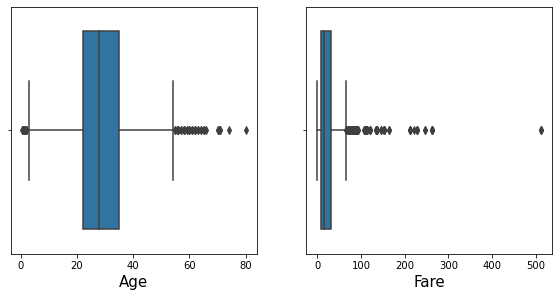

In [19]:
plt.figure(figsize = (15,10), facecolor='white')
graphplot = 1
for column in numerical_variables:
    if graphplot<=6:
        ax = plt.subplot(2,3,graphplot)
        sns.boxplot(Titanic_df[column])
        plt.xlabel(column,fontsize=15)
    graphplot+=1
plt.show()


**Here, we can understand from the plots that for:**
1. Age: All values greater than 65 approximately can be said as outliers
2. Fare: Mostly the values greater than 200 can be said as outliers. And the outlier lies at
greater than 500

In [20]:
Titanic_df[Titanic_df["Age"] > 65]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [21]:
Titanic_df[Titanic_df["Fare"] > 200]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S


In [22]:
Titanic_df[Titanic_df["Fare"] > 500]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [23]:
Q1_Fare = np.quantile(Titanic_df["Fare"], 0.25)
Q3_Fare = np.quantile(Titanic_df["Fare"], 0.75)

IQR_Fare = Q3_Fare - Q1_Fare

In [24]:
Q1_Age = np.quantile(Titanic_df["Age"], 0.25)
Q3_Age = np.quantile(Titanic_df["Age"], 0.75)

IQR_Age = Q3_Age - Q1_Age

In [25]:
MIN_VALUE_Age = Q1_Fare - 1.5 * IQR_Age
print(f"The Minimum Value: {MIN_VALUE_Age}")

The Minimum Value: -11.5896


In [26]:
MAX_VALUE_Age = Q3_Age + 1.5 * IQR_Age
print(f"The Maximum Value: {MAX_VALUE_Age}")

The Maximum Value: 54.5


In [27]:
MIN_VALUE_Fare = Q1_Fare - 1.5 * IQR_Fare
print(f"The Minimum Value: {MIN_VALUE_Fare}")

The Minimum Value: -26.724


In [28]:
MAX_VALUE_fare = Q3_Fare + 1.5 * IQR_Fare
print(f"The Maximum Value: {MAX_VALUE_fare}")

The Maximum Value: 65.6344


**We can identify the outliers by considering the Min and Max values of the range for Age and Fare respectively and we are able to recognize the Outliers by finding the values below Min value and above max value respectively**

---

## ~ Handling Rare Variables

In [29]:
# Here, we can define the rare variables which can exist rarely in the dataset
rare_variables = ["Name", "Ticket"]

In [30]:
for feature in rare_variables:
 temp = Titanic_df.groupby(feature)["Fare"].count() / len(Titanic_df)
 temp_df = temp[temp > 0.01].index
 Titanic_df[feature] = np.where(Titanic_df[feature].isin(temp_df), Titanic_df[feature], 'Rare Variables')
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Rare Variables,male,22.0,1,0,Rare Variables,7.2500,S
1,2,1,1,Rare Variables,female,38.0,1,0,Rare Variables,71.2833,C
2,3,1,3,Rare Variables,female,26.0,0,0,Rare Variables,7.9250,S
3,4,1,1,Rare Variables,female,35.0,1,0,Rare Variables,53.1000,S
4,5,0,3,Rare Variables,male,35.0,0,0,Rare Variables,8.0500,S


In [31]:
for feature in rare_variables:
 temp = Titanic_df.groupby(feature)["Age"].count() / len(Titanic_df)
 temp_df = temp[temp > 0.01].index
 Titanic_df[feature] = np.where(Titanic_df[feature].isin(temp_df), Titanic_df[feature], 'Rare Variables')
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Rare Variables,male,22.0,1,0,Rare Variables,7.2500,S
1,2,1,1,Rare Variables,female,38.0,1,0,Rare Variables,71.2833,C
2,3,1,3,Rare Variables,female,26.0,0,0,Rare Variables,7.9250,S
3,4,1,1,Rare Variables,female,35.0,1,0,Rare Variables,53.1000,S
4,5,0,3,Rare Variables,male,35.0,0,0,Rare Variables,8.0500,S


In [32]:
for feature in rare_variables:
 labels = Titanic_df.groupby(feature)['Fare'].mean().sort_values().index
 labels = {j:i for i, j in enumerate(labels, 0)}
 Titanic_df[feature] = Titanic_df[feature].map(labels)
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,male,22.0,1,0,0,7.2500,S
1,2,1,1,0,female,38.0,1,0,0,71.2833,C
2,3,1,3,0,female,26.0,0,0,0,7.9250,S
3,4,1,1,0,female,35.0,1,0,0,53.1000,S
4,5,0,3,0,male,35.0,0,0,0,8.0500,S


In [33]:
for feature in rare_variables:
 labels = Titanic_df.groupby(feature)['Age'].mean().sort_values().index
 labels = {j:i for i, j in enumerate(labels, 0)}
 Titanic_df[feature] = Titanic_df[feature].map(labels)

Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,male,22.0,1,0,0,7.2500,S
1,2,1,1,0,female,38.0,1,0,0,71.2833,C
2,3,1,3,0,female,26.0,0,0,0,7.9250,S
3,4,1,1,0,female,35.0,1,0,0,53.1000,S
4,5,0,3,0,male,35.0,0,0,0,8.0500,S


---

## ~ Encoding on the nominal and ordinal & categorical variables
> One-hot encoding:
keeps all information about variable, but create a lot of new features

> Binary encoding:
keeps all information about variable, creates new dimensions, but less than one-hot encoder

> Ordinal numbering encoding:
keeps semantical info about variable, but treats 2-1 as 3-2 and can be missleading, doesn't create new dimensions

---

# Ordinal Encoding

In [34]:
ordinal_features = Titanic_df[['Embarked']].copy() 
ordinal_features.head(10)

,Embarked
0,S
1,C
2,S
3,S
4,S
5,Q
6,S
7,S
8,S
9,C


In [35]:
def encode_ordinal_features(Titanic_df): 
 Embarked = {'S':1, 'C':2, 'Q':3} 
 Titanic_df['Embarked'] =Titanic_df.Embarked.map(Embarked) 
 return Titanic_df 
ordinal_features = encode_ordinal_features(ordinal_features) 
ordinal_features.head(10) 

,Embarked
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
5,3.0
6,1.0
7,1.0
8,1.0
9,2.0


---

## One Hot Encoding:

In [36]:
pd.get_dummies(Titanic_df['Gender']).head()
pd.concat([Titanic_df['Gender'], pd.get_dummies(Titanic_df['Gender'])], axis=1).head(10)

,Gender,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1
5,male,0,1
6,male,0,1
7,male,0,1
8,female,1,0
9,female,1,0


---

# Conclusion:
In conclusion, the data has been cleaned, and the outliers and rare variables have been identified. In addition, we have integrated the necessary methods for both the exploratory data analysis and feature engineering. On the nominal and ordinal categorical variables of the provided Titanic Dataset, we applied Feature Encoding Techniques.